# Sharded Cellpose Segmentation

In [1]:
import os
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import ShardedCytosolSegmentationCellpose
from scportrait.pipeline.selection import LMDSelection

In [2]:
project_location = "project_sharded"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example1.yml",
    overwrite=True,
    debug=True,
    segmentation_f=ShardedCytosolSegmentationCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[20/03/2025 14:03:39] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/config.yml
[20/03/2025 14:03:39] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./ShardedCytosolSegmentationCellpose_ntcgl_fv for ShardedCytosolSegmentationCellpose
[20/03/2025 14:03:39] Compression algorithm for extracted single-cell images: lzf


In [3]:
from scportrait.data._datasets import dataset_1

dataset_1_path = dataset_1()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_1_path}/Ch1.tif", f"{dataset_1_path}/Ch2.tif", f"{dataset_1_path }/Ch3.tif"]

project.load_input_from_tif_files(images, channel_names = ["Hoechst", "Alexa488", "mCherry"])

[20/03/2025 14:03:39] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/sc
         portrait.sdata                                                                                            


[20/03/2025 14:03:39] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_cq2pl0g3 for Project
[20/03/2025 14:03:39] Image input_image written to sdata object.
[20/03/2025 14:03:39] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_cq2pl0g3'>


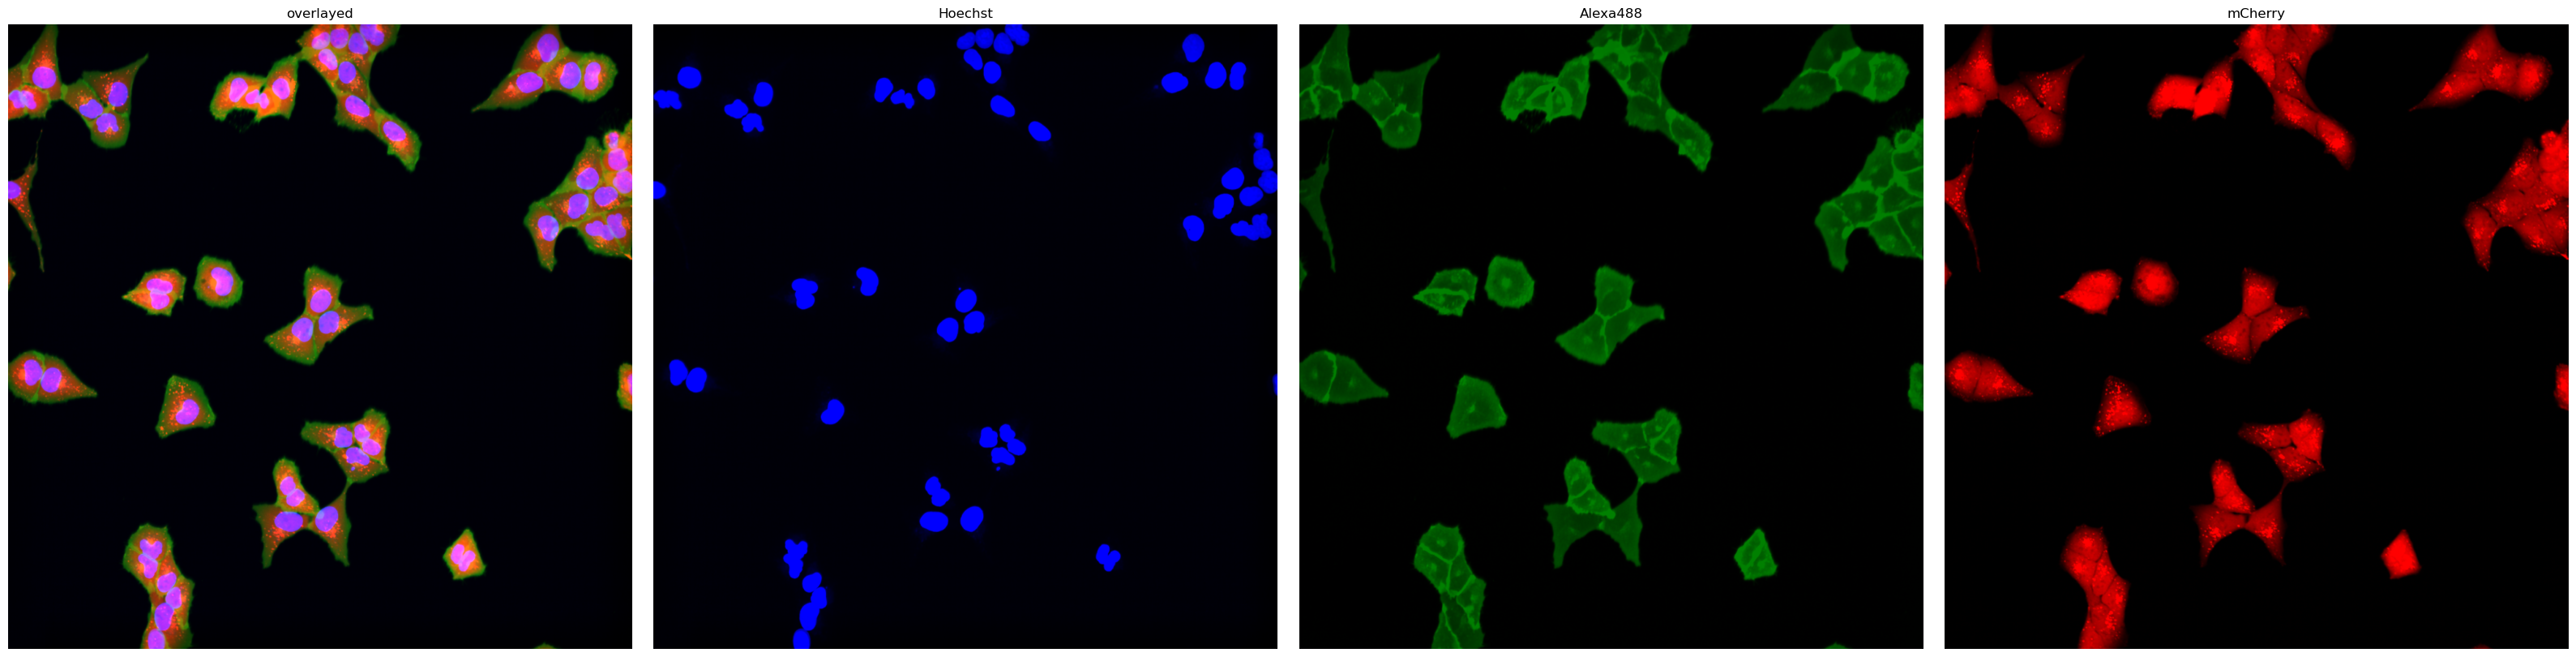

In [4]:
project.plot_input_image()

In [5]:
project.segment()

[20/03/2025 14:03:45] Mapped input image to memory-mapped array.
[20/03/2025 14:03:45] Created new shard directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/segmentation/tiles
[20/03/2025 14:03:45] target size 2000000 is smaller than input image 9229443. Sharding will be used.
[20/03/2025 14:03:45] input image 3039 px by 3037 px
[20/03/2025 14:03:45] target_shard_size: 2000000
[20/03/2025 14:03:45] sharding plan:
[20/03/2025 14:03:45] 2 rows by 2 columns
[20/03/2025 14:03:45] 1519 px by 1518 px
[20/03/2025 14:03:45] Saving Sharding plan to file: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/segmentation/sharding_plan.csv
[20/03/2025 14:03:45] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CytosolSegmentationCellpose_ebdbodo_ for CytosolSegmentationCellpose
[20/03/2025 14:03:45] Initialized temporary directory at /var/folders/35/p

Segmenting Image Tiles:   0%|          | 0/4 [00:00<?, ?it/s]

[20/03/2025 14:03:50] Beginning Segmentation of Shard with the slicing (slice(0, 1619, None), slice(0, 1618, None))
[20/03/2025 14:03:50] Beginning Segmentation of Shard with the slicing (slice(0, 1619, None), slice(1418, 3037, None))
[20/03/2025 14:03:50] Time taken to load input image: 0.005102834198623896
[20/03/2025 14:03:50] Time taken to load input image: 0.008423125371336937
[20/03/2025 14:03:50] GPU Status for segmentation is True and will segment using the following device mps.
[20/03/2025 14:03:50] GPU Status for segmentation is True and will segment using the following device mps.
[20/03/2025 14:03:50] Segmenting nucleus using the following model: nuclei[20/03/2025 14:03:50] Segmenting nucleus using the following model: nuclei



/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[20/03/2025 14:03:54] Segmenting cytosol using the following model: cyto2
[20/03/2025 14:03:54] Segmenting cytosol using the following model: cyto2


/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)
/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[20/03/2025 14:04:00] Performing filtering to match Cytosol and Nucleus IDs.
[20/03/2025 14:04:00] Performing filtering to match Cytosol and Nucleus IDs.
[20/03/2025 14:04:01] Removed 47 nuclei and 22 cytosols due to filtering.
[20/03/2025 14:04:01] After filtering, 109 matching nuclei and cytosol masks remain.
[20/03/2025 14:04:01] Removed 46 nuclei and 19 cytosols due to filtering.
[20/03/2025 14:04:01] After filtering, 149 matching nuclei and cytosol masks remain.
[20/03/2025 14:04:02] Total time to perform nucleus and cytosol mask matching filtering: 2.72 seconds
[20/03/2025 14:04:02] Filtering status for this segmentation is set to True.
[20/03/2025 14:04:02] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[20/03/2025 14:04:02] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/segmentation/tiles/1/classes.csv.
[20/03/2025 14:04:02] 

/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)
/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[20/03/2025 14:04:09] Performing filtering to match Cytosol and Nucleus IDs.
[20/03/2025 14:04:09] Performing filtering to match Cytosol and Nucleus IDs.
[20/03/2025 14:04:10] Removed 32 nuclei and 12 cytosols due to filtering.
[20/03/2025 14:04:10] After filtering, 71 matching nuclei and cytosol masks remain.
[20/03/2025 14:04:10] Removed 57 nuclei and 25 cytosols due to filtering.
[20/03/2025 14:04:10] After filtering, 89 matching nuclei and cytosol masks remain.
[20/03/2025 14:04:12] Total time to perform nucleus and cytosol mask matching filtering: 2.32 seconds
[20/03/2025 14:04:12] Filtering status for this segmentation is set to True.
[20/03/2025 14:04:12] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[20/03/2025 14:04:12] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/segmentation/tiles/3/classes.csv.
[20/03/2025 14:04:12] ==

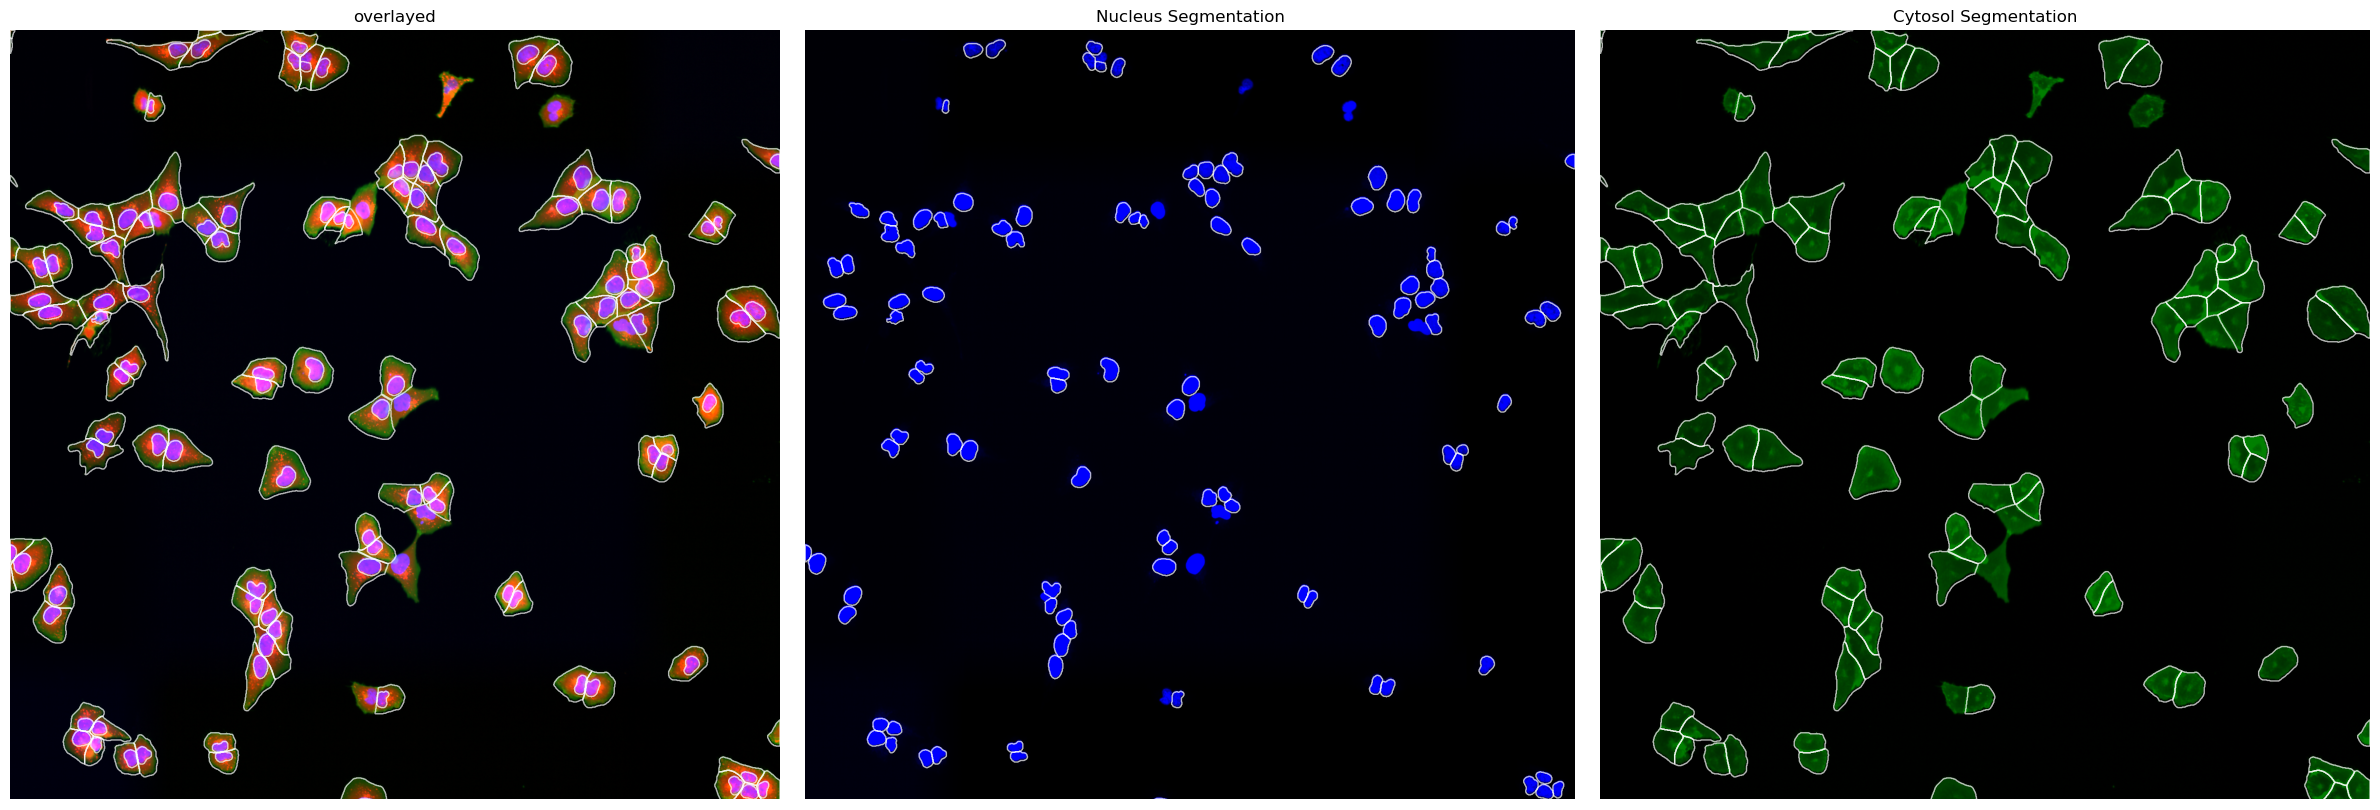

In [6]:
project.plot_segmentation_masks()

In [7]:
project.extract()

[20/03/2025 14:04:18] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_tdi7lzyu for HDF5CellExtraction
[20/03/2025 14:04:18] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/extraction/data
[20/03/2025 14:04:18] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/extraction/data
[20/03/2025 14:04:18] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[20/03/2025 14:04:18] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[20/03/2025 14:04:18] A total of 9 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_proj

Extracting cell batches:   0%|          | 0/4 [00:00<?, ?it/s]

[20/03/2025 14:04:19] Finished extraction in 0.47 seconds (795.04 cells / second)
[20/03/2025 14:04:19] Benchmarking times saved to file.
[20/03/2025 14:04:19] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_tdi7lzyu'>


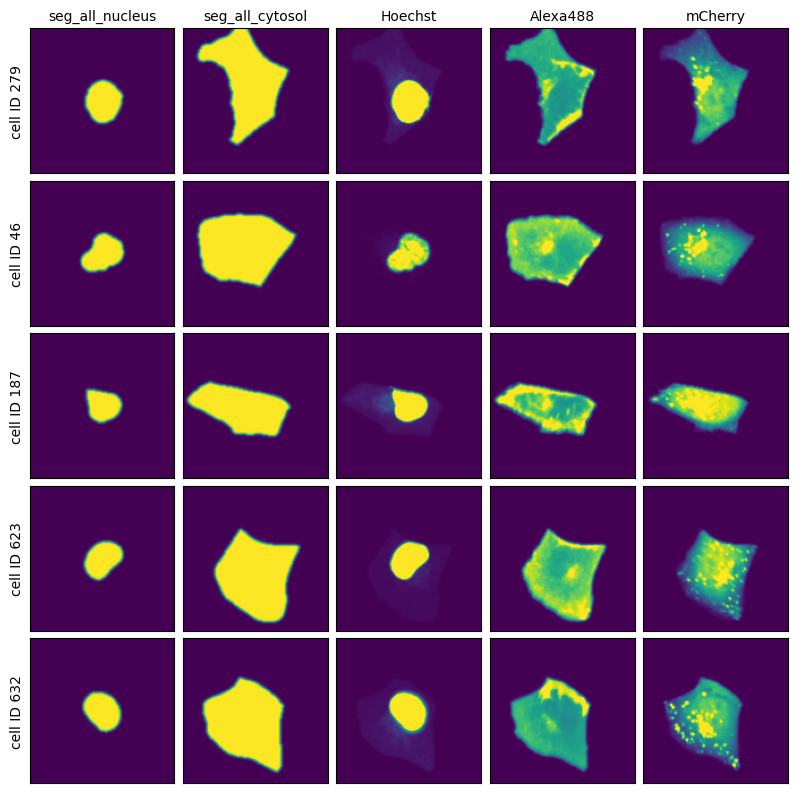

In [8]:
project.plot_single_cell_images()

In [9]:
project.featurize(overwrite = True)

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/extraction/data/single_cells.h5sc
[20/03/2025 14:04:21] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_79fogejz for CellFeaturizer
[20/03/2025 14:04:21] Started CellFeaturization of all available channels.
[20/03/2025 14:04:21] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/featurization/complete_CellFeaturizer
[20/03/2025 14:04:21] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[20/03/2025 14:04:21] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_jidxi3ai for CellFeaturizer
[20/03/2025 14:04:21] Reading data from path: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_pr

In [10]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

,nucleus_area,cytosol_area,cytosol_only_area,Hoechst_mean_nucleus,Hoechst_median_nucleus,Hoechst_quant75_nucleus,Hoechst_quant25_nucleus,Hoechst_summed_intensity_nucleus,Hoechst_summed_intensity_area_normalized_nucleus,Hoechst_mean_cytosol,...,mCherry_summed_intensity_cytosol,mCherry_summed_intensity_area_normalized_cytosol,mCherry_mean_cytosol_only,mCherry_median_cytosol_only,mCherry_quant75_cytosol_only,mCherry_quant25_cytosol_only,mCherry_summed_intensity_cytosol_only,mCherry_summed_intensity_area_normalized_cytosol_only,label,cell_id
0,1278.0,4273.0,2995.0,0.040320,0.0,1.192093e-07,0.0,660.60230,0.220568,0.040320,...,1916.3596,0.639853,0.116965,0.0,2.980232e-07,0.0,1916.3596,0.639853,0,14
1,1380.0,4980.0,3600.0,0.057506,0.0,1.778841e-03,0.0,942.17737,0.261716,0.057506,...,2160.9766,0.600271,0.131896,0.0,3.061295e-03,0.0,2160.9766,0.600271,0,17
2,1489.0,4273.0,2794.0,0.059866,0.0,1.072884e-06,0.0,980.83820,0.351052,0.059866,...,1751.9409,0.627037,0.106930,0.0,6.556511e-07,0.0,1751.9409,0.627037,0,18
3,1712.0,6824.0,5112.0,0.073903,0.0,2.632141e-02,0.0,1210.82860,0.236860,0.073903,...,2234.5938,0.437127,0.136389,0.0,1.261291e-01,0.0,2234.5938,0.437127,0,19
4,1658.0,3768.0,2110.0,0.068116,0.0,0.000000e+00,0.0,1116.00610,0.528913,0.068116,...,2073.1445,0.982533,0.126535,0.0,0.000000e+00,0.0,2073.1445,0.982533,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1064.0,2744.0,1684.0,0.033506,0.0,0.000000e+00,0.0,548.97010,0.325992,0.033506,...,1313.7927,0.780162,0.080188,0.0,0.000000e+00,0.0,1313.7927,0.780162,0,1360
366,1478.0,5968.0,4490.0,0.055512,0.0,2.802849e-03,0.0,909.50650,0.202563,0.055512,...,2116.3516,0.471348,0.129172,0.0,5.178070e-02,0.0,2116.3516,0.471348,0,1361
367,1124.0,4149.0,3025.0,0.034669,0.0,0.000000e+00,0.0,568.01600,0.187774,0.034669,...,1566.5344,0.517863,0.095614,0.0,0.000000e+00,0.0,1566.5344,0.517863,0,1362
368,1502.0,6155.0,4653.0,0.055164,0.0,2.731323e-03,0.0,903.80430,0.194241,0.055164,...,2243.8467,0.482237,0.136954,0.0,6.857300e-02,0.0,2243.8467,0.482237,0,1363


In [11]:
#test selection workflow
selected_cells_large = results[results.cytosol_area > 4500]["cell_id"].tolist()
selected_cells_small = results[results.cytosol_area < 3000]["cell_id"].tolist()

cells_to_select = [
    {"name": "large_cells", "classes": selected_cells_large, "well": "A1"},
    {"name": "small_cells", "classes": selected_cells_small, "well": "B1"},
]

marker_0 = (0, 0)
marker_1 = (2000, 0)
marker_2 = (0, 2000)

calibration_marker = np.array([marker_0, marker_1, marker_2])


[20/03/2025 14:04:28] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_4bsokwdf for LMDSelection
[20/03/2025 14:04:28] Selection process started.


Processing cell batches:   0%|          | 0/3 [00:00<?, ?it/s]

[20/03/2025 14:04:35] Temporary directory not found, skipping cleanup
[20/03/2025 14:04:35] Temporary directory not found, skipping cleanup
[20/03/2025 14:04:35] Temporary directory not found, skipping cleanup
[20/03/2025 14:04:36] Coordinate lookup index calculation took 8.042293332982808 seconds.
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for rdp_epsilon found, parameter will be set to 0.1
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for join_intersecting found, parameter will be set to True
Path optimizer used for XML generation: hilbert
cell set 0 passed sanity check
cell set 1 passed sanity check
Loading coordinates from external source
Processing cell sets in parall

collecting cell sets:   0%|          | 0/2 [00:00<?, ?it/s]

Convert label format into coordinate format
Convert label format into coordinate format
Conversion finished, performing sanity check.
Intersecting Shapes will be merged into a single shape.
Conversion finished, performing sanity check.
Intersecting Shapes will be merged into a single shape.


dilating shapes: 100%|██████████| 169/169 [00:03<00:00, 44.65it/s]


0 shapes that were intersecting were found and merged.


creating shapes:   0%|          | 0/32 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.


calculating polygons: 100%|██████████| 32/32 [00:04<00:00,  7.49it/s]


Current path length: 22,009.11 units


calculating polygons:   6%|▌         | 6/107 [00:03<00:43,  2.33it/s]

Optimized path length: 14,938.51 units
Optimization factor: 1.5x


calculating polygons:   9%|▉         | 10/107 [00:04<00:30,  3.15it/s]

Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.


calculating polygons: 100%|██████████| 107/107 [00:05<00:00, 19.27it/s]


Current path length: 61,201.37 units
Optimized path length: 28,918.49 units
Optimization factor: 2.1x
Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.


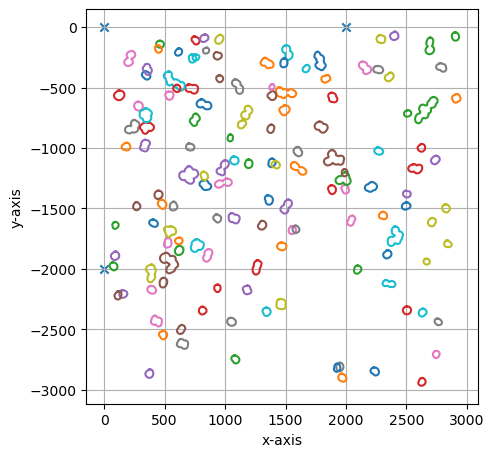

===== Collection Stats =====
Number of shapes: 139
Number of vertices: 10,807
Mean vertices: 78
Min vertices: 51
5% percentile vertices: 56
Median vertices: 66
95% percentile vertices: 139
Max vertices: 215
[0 0]
[      0 -200000]
[200000      0]
[20/03/2025 14:04:52] Saved output at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_sharded/selection/large_cells_small_cells.xml
[20/03/2025 14:04:53] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_4bsokwdf'>


In [12]:
project.select(cells_to_select, calibration_marker)